# Load data

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We assume you already have a folder called `workspace` that contains zipped dataset.

In [2]:
%cd ../notebooks/workspace

/mnt/d/courses/RANSAC-Flow/notebooks/workspace


In [9]:
import logging

logging.basicConfig(
    level=logging.DEBUG,
    format="[%(asctime)s] %(name)s :: %(levelname)s :: %(message)s",
    handlers=[logging.StreamHandler()],
)


We organize training and validation dataset into [`LightningDataModule`](https://pytorch-lightning.readthedocs.io/en/latest/guides/data.html#why-lightningdatamodules).
This is a thin wrapper around map-style PyTorch datasets and their corresponding data loader.

The following script load the MegaDepth training set explicitly.

In [131]:
from ransacflow.data.megadepth import MegaDepthTrainingDataset

data = MegaDepthTrainingDataset("MegaDepth_cleansed.zip", "train")
print(f"{len(data)} files")

20000 files


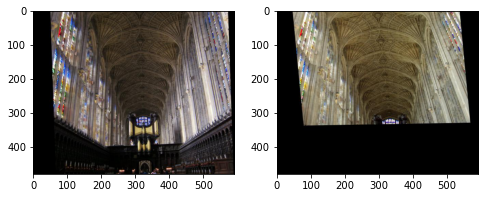

In [133]:
import matplotlib.pyplot as plt

im_pair = data[0]

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
for i, ax_ in enumerate(ax):
    ax_.imshow(im_pair[i]);

Validation set is a bit different in MegaDepth, it relies on a pre-compiled list of image pairs and feature points.

In [134]:
from ransacflow.data.megadepth import MegaDepthValidationDataset

data = MegaDepthValidationDataset('MegaDepth_cleansed.zip', 'validate')
print(f'{len(data)} files')

[2021-12-31 12:10:40,358] WARNING file integrity is not explicitly tested


500 files


[[ 1.         -0.05590498  0.1378989 ]
 [-0.25238094  1.0333333  -0.03984127]]


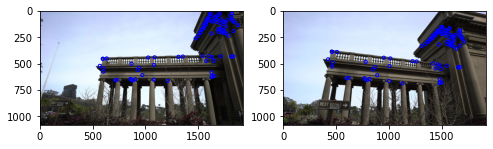

In [143]:
import matplotlib.pyplot as plt

(src_image, src_feat), (tgt_image, tgt_feat), affine_mat = data[0]

print(affine_mat)

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

scatter_args = {"s": 10, "facecolors": "none", "edgecolors": "blue", "marker": "o"}

ax[0].imshow(src_image);
ax[0].scatter(src_feat[:, 0], src_feat[:, 1], **scatter_args);

ax[1].imshow(tgt_image);
ax[1].scatter(tgt_feat[:, 0], tgt_feat[:, 1], **scatter_args);
